## Experiment
Experiment: Effect of suicide rates on life expectancy

### Environment Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler

In [2]:
DATA = "../10_Data/30_merged_dataset_v00_final.csv"

#### Load dataset

In [3]:
mergedDf = pd.read_csv(DATA)
mergedDf = mergedDf.set_index(['Country', 'Year'])
mergedDf.head()

Suicides number  Life expectancy  Adult Mortality  \
Country Year                                                      
Albania 2000             54.0             72.6             11.0   
        2001            119.0             73.6             14.0   
        2002            133.0             73.3             15.0   
        2003            124.0             72.8             18.0   
        2004            146.0             73.0             17.0   

              Infant deaths  Alcohol  Under-five deaths  HIV/AIDS  \
Country Year                                                        
Albania 2000              1     3.66                  1       0.1   
        2001              1     4.25                  1       0.1   
        2002              1     3.73                  1       0.1   
        2003              1     4.29                  1       0.1   
        2004              1     4.54                  1       0.1   

                      GDP  Population  Income composition of resources  \
Country Year                                                             
Albania 2000  1175.788981     38927.0                            0.656   
        2001  1326.973390     36173.0                            0.662   
        2002  1453.642777      3511.0                            0.670   
        2003   189.681557    339616.0                            0.674   
        2004  2416.588235    326939.0                            0.681   

              Schooling  
Country Year             
Albania 2000       10.7  
        2001       10.6  
        2002       10.7  
        2003       10.7  
        2004       10.9

#### Scaling

In [4]:
scaler = MinMaxScaler()
scaledDf = pd.DataFrame(scaler.fit_transform(mergedDf), columns = mergedDf.columns)
scaledDf.head()

,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,0.000948,0.535411,0.020121,0.009009,0.204367,0.007874,0.0,0.009852,0.000130,0.691983,0.516908
1,0.002089,0.563739,0.026157,0.009009,0.237402,0.007874,0.0,0.011121,0.000120,0.698312,0.512077
2,0.002335,0.555241,0.028169,0.009009,0.208287,0.007874,0.0,0.012184,0.000012,0.706751,0.516908
3,0.002177,0.541076,0.034205,0.009009,0.239642,0.007874,0.0,0.001578,0.001132,0.710970,0.516908
4,0.002563,0.546742,0.032193,0.009009,0.253639,0.007874,0.0,0.020264,0.001089,0.718354,0.526570


#### Describe dataset

In [5]:
mergedDf.describe()

,Suicides number,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Under-five deaths,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1.421000e+03,1421.000000,1421.000000
mean,2629.177340,75.233638,116.912738,5.805067,6.664729,7.038705,0.397537,14018.867107,1.294056e+07,0.748189,13.929838
std,6755.607644,5.399686,74.413799,13.088297,3.917763,16.104082,2.227681,19697.409425,3.652156e+07,0.160380,2.462661
min,0.000000,53.700000,1.000000,0.000000,0.010000,0.000000,0.100000,1.681350,3.400000e+01,0.000000,0.000000
25%,85.000000,72.500000,68.000000,0.000000,3.540000,0.000000,0.100000,1564.966945,2.541220e+05,0.695000,12.500000
50%,501.000000,74.900000,117.000000,1.000000,6.950000,1.000000,0.100000,4622.415160,1.735275e+06,0.773000,13.800000
75%,1867.000000,78.900000,163.000000,4.000000,9.800000,5.000000,0.100000,16462.485560,7.463157e+06,0.852000,15.600000
max,56958.000000,89.000000,498.000000,111.000000,17.870000,127.000000,29.700000,119172.741800,3.000785e+08,0.948000,20.700000


#### Correlation among variables

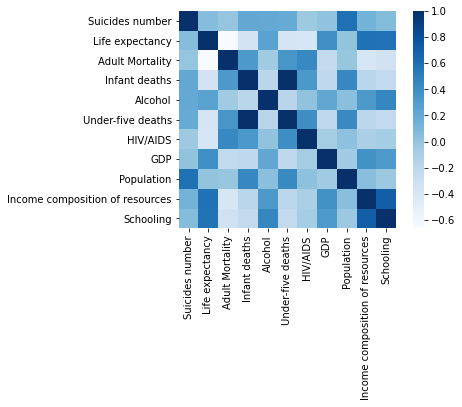

In [6]:
corr = scaledDf.corr()
sns_correlation = sns.heatmap(corr, square = True, cmap = "Blues")
sns_correlation.figure.savefig("../30_Output/10_correlation_v01.png")

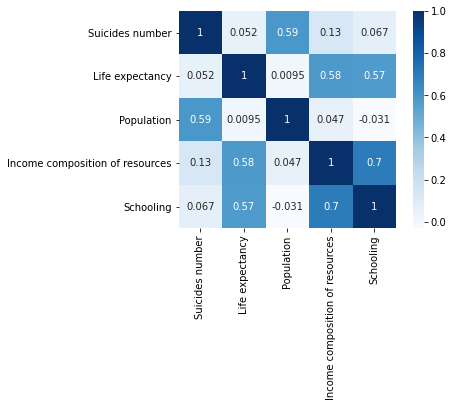

In [7]:
corr_2 = scaledDf[['Suicides number', 'Life expectancy', 'Population', 'Income composition of resources', 'Schooling']].corr()
sns_correlation_2 = sns.heatmap(corr_2, annot=True, square = True, cmap = "Blues")
sns_correlation_2.figure.savefig("../30_Output/10_correlation_v02.png")

#### Pairplot

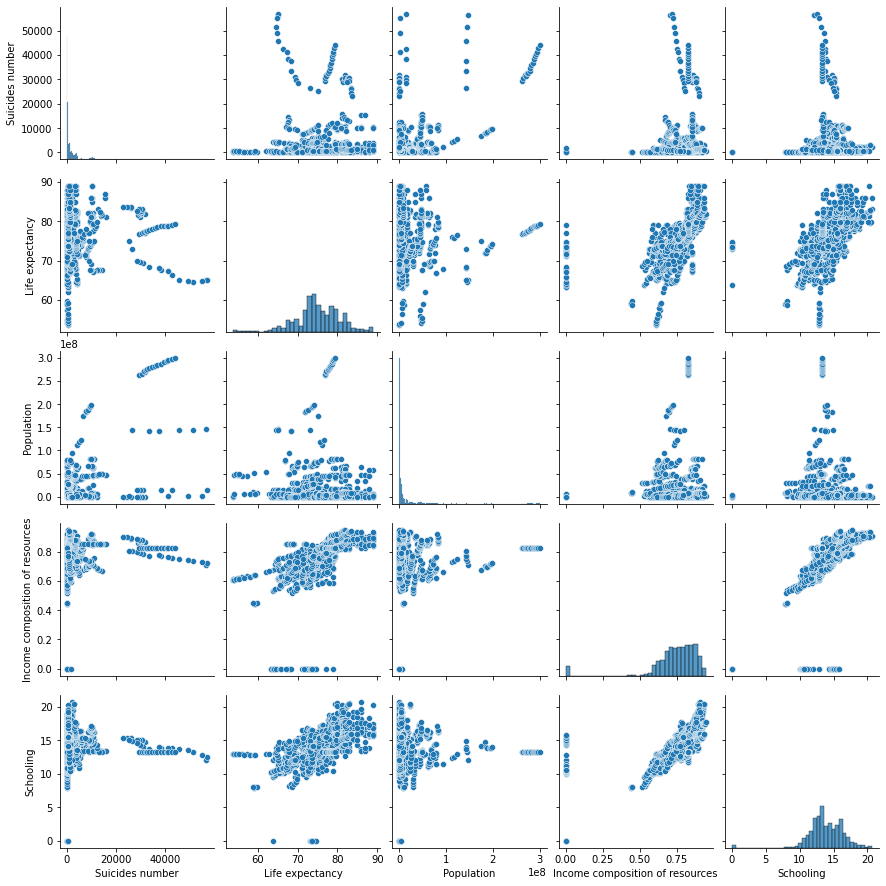

In [8]:
# Pairplot
sns_pairplot = sns.pairplot(mergedDf[['Suicides number', 'Life expectancy', 'Population', 'Income composition of resources', 'Schooling']])
sns_pairplot.savefig("../30_Output/20_pairplot_v01.png")

At the first sight, it seems that there is no effect suicide rate on life expectancy, because I did not find any pattern and the correlation is very weak.

#### Simple regression

I decided to use simple regression to prove the hypothesis, because the predicate and outcome variable are quantitative.

In [9]:
mod = ols('Suicides_number ~ Life_expectancy', data = scaledDf.rename(columns={'Suicides number': 'Suicides_number', 'Life expectancy': 'Life_expectancy'}))
res = mod.fit()
res.save("../30_Output/30_ols_regression_results_v01.pickle")
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        Suicides_number   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.918
Date:                Wed, 14 Apr 2021   Prob (F-statistic):             0.0480
Time:                        23:30:17   Log-Likelihood:                 1015.6
No. Observations:                1421   AIC:                            -2027.
Df Residuals:                    1419   BIC:                            -2017.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0213      0.013     

#### Summary

From the results we can see that the difference is statistically significant because the p-value is smaller than the selected significance value of 0.05. Therefore, the null hypothesis was rejected and I can say that there is effect of suicide rates on life expectancy.